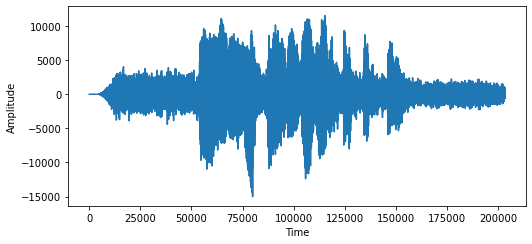

In [88]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
s, data = read(r"C:\Users\EBIN ANTONY\Desktop\ee\afsa1.wav")
#audio = input_data[1]
plt.plot(data)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

### Noise Adding

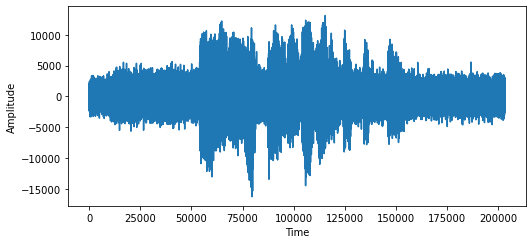

In [111]:
STD_n= 1000
noise=np.random.normal(0, STD_n, data.shape[0])
signal_noise = data+noise
plt.plot(signal_noise)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

In [119]:
import sys, os, os.path
from scipy.io import wavfile
import pandas as pd

input_filename = input("Input file number:")
if input_filename[-3:] != 'wav':
    print('WARNING!! Input File format should be *.wav')
    sys.exit()

Input file number:1
WARNING!! Input File format should be *.wav


SystemExit: 

C:\Users\EBIN ANTONY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [18]:
samrate, data = wavfile.read(str(r"C:\Users\EBIN ANTONY\Desktop\ee\afsa1.wav"))
print('Load is Done! \n')

Load is Done! 



In [19]:
wavData = pd.DataFrame(data)

if len(wavData.columns) == 2:
    print('Stereo .wav file\n')
    wavData.columns = ['R', 'L']
    stereo_R = pd.DataFrame(wavData['R'])
    stereo_L = pd.DataFrame(wavData['L'])
    print('Saving...\n')
    stereo_R.to_csv(str(input_filename[:-4] + "_Output_stereo_R.csv"), mode='w')
    stereo_L.to_csv(str(input_filename[:-4] + "_Output_stereo_L.csv"), mode='w')
    # wavData.to_csv("Output_stereo_RL.csv", mode='w')
    print('Save is done ' + str(input_filename[:-4]) + '_Output_stereo_R.csv , '
                          + str(input_filename[:-4]) + '_Output_stereo_L.csv')

elif len(wavData.columns) == 1:
    print('Mono .wav file\n')
    wavData.columns = ['M']

    wavData.to_csv(str(input_filename[:-4] + "_Output_mono.csv"), mode='w')

    print('Save is done ' + str(input_filename[:-4]) + '_Output_mono.csv')

else:
    print('Multi channel .wav file\n')
    print('number of channel : ' + len(wavData.columns) + '\n')
    wavData.to_csv(str(input_filename[:-4] + "Output_multi_channel.csv"), mode='w')

    print('Save is done ' + str(input_filename[:-4]) + 'Output_multi_channel.csv')

Mono .wav file

Save is done _Output_mono.csv


## Data Reading

In [29]:
df = pd.read_csv(r"C:\Users\EBIN ANTONY\Desktop\ee\_Output_mono.csv")
df.columns = ['T','S']
print(df.head())
print(df.tail())

   T  S
0  0  0
1  1  0
2  2 -1
3  3  0
4  4  0
             T    S
203323  203323  182
203324  203324  370
203325  203325  470
203326  203326  291
203327  203327  104


## Visualize Data

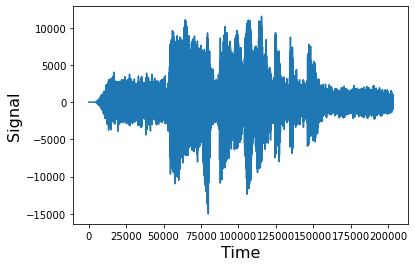

In [30]:
# Visualize data

x = df['T']
y = df['S']

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Signal', fontsize = 16)
plt.show()

## Outlier Detection

C:\Users\EBIN ANTONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


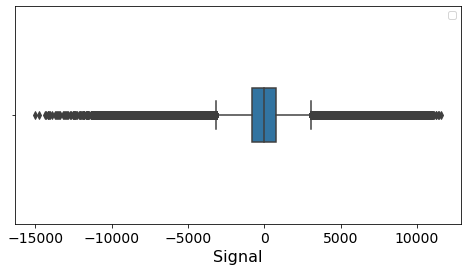

In [33]:
# Outlier Detection

import seaborn as sns 
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(df['S'], width=(0.25))
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel('Signal', fontsize = 16)
plt.legend()
plt.show()

### Outlier Removal Using Z - Score

In [39]:
from scipy import stats
import numpy as np
df = df.set_index('T')
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores<3).all(axis=1)
new_df = df[filtered_entries]
new_df.head()

,S
T,
0,0
1,0
2,-1
3,0
4,0


In [40]:
new_df.tail()

,S
T,
203323,182
203324,370
203325,470
203326,291
203327,104


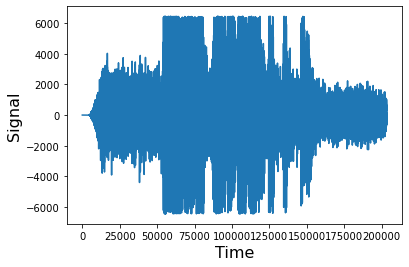

In [42]:
plt.plot(new_df['S'])
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Signal', fontsize = 16)
plt.show()

### Outlier Removal Using IQR

In [43]:
from numpy import percentile
from numpy.random import rand

S = df['S']
quartiles = percentile(S, [25, 50, 75])
# calculate min/max
data_min, data_max = S.min(), S.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)
IQR = quartiles[2]-quartiles[1]
print('IQR: %.3f' % IQR)

Min: -15029.000
Q1: -819.000
Median: -1.000
Q3: 738.000
Max: 11543.000
IQR: 739.000


In [44]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
import numpy as np

# calculate interquartile range
q25, q75 = percentile(df, 25), percentile(df, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=-819.000, 75th=738.000, IQR=1557.000


In [45]:
#find Q1, Q3, and interquartile range for each column
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(177457, 1)

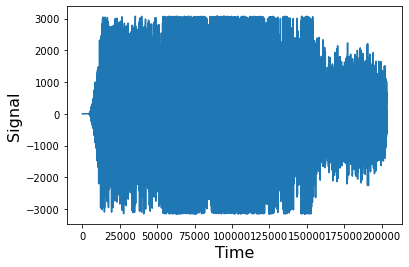

In [47]:
plt.plot(data_clean['S'])
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Signal', fontsize = 16)
plt.show()

## Smoothing

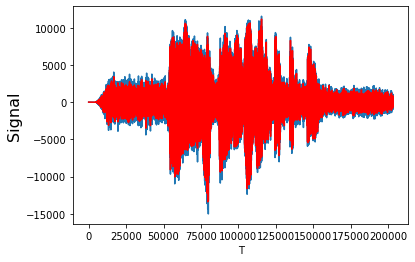

In [53]:
S = df['S']
rolling = S.rolling(window=8)
rolling_mean = rolling.mean()

plt.plot(S, label= 'Raw Data')
rolling_mean.plot(color='red', label = 'Smoothing')
plt.ylabel('Signal', fontsize = 16)
plt.show()